In [26]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [27]:
file = pd.read_csv('GameData.csv' ,dtype = {'name': str,'owners':int,'developer ' : str ,'publisher':str , 'price ':float ,'initialprice ':float }, header=0, low_memory=False , keep_default_na=False , encoding='ANSI')


In [28]:
list(file.columns.values)

['appid',
 'name',
 'developer',
 'publisher',
 'score_rank',
 'positive',
 'negative',
 'userscore',
 'owners',
 'average_forever',
 'average_2weeks',
 'median_forever',
 'median_2weeks',
 'price',
 'initialprice',
 'discount',
 'ccu',
 'languages',
 'genre',
 'tags',
 'genre1',
 'genre2',
 'genre3',
 'genre4',
 'genre5',
 'genre6',
 'genre7',
 'English',
 'Chinese',
 'French',
 'German',
 'Italian',
 'Spanish',
 'Total Languages',
 'Collection']

In [40]:
def getOutLiars(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    return ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

owners    7894
dtype: int64


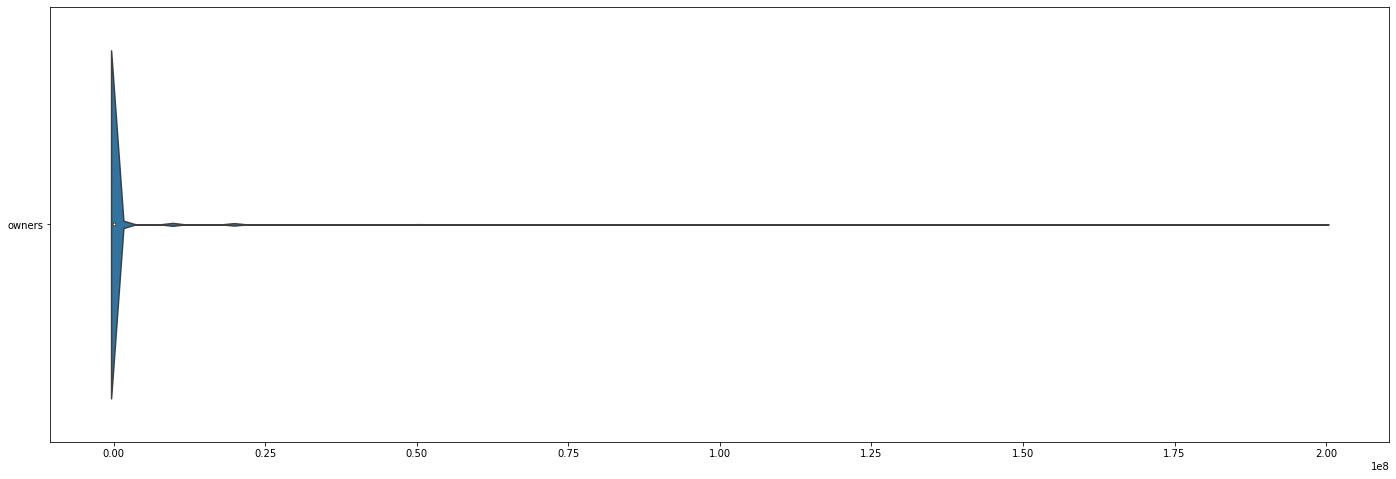

In [41]:
owners = pd.DataFrame(file['owners'])

f = plt.figure(figsize=(24,8))
sb.violinplot(data = owners,orient='h')

print(getOutLiars(owners))

In [31]:
owners.describe()

,owners
count,4.230400e+04
mean,1.825234e+05
std,1.688522e+06
min,0.000000e+00
25%,2.000000e+04
50%,2.000000e+04
75%,5.000000e+04
max,2.000000e+08
